## Linear Regression

I make this part as the starting point of the Pytorch learning. (Fine, actually not me, but the up from BiliBili...)  
Since this is the first part, let's make it straightforwar ->: assuming a simple linear model as belw (without any noise)ow

$$
y = 3x
$$

Then let's iterate over the weight, from 0 to 5 in this case, and calculate the total differences between the true output and the estimated one.  
The last step of this part is to obtain the MSE (Mean Squared Error) by dividing the total squared difference by th  number of samples, then plotting the results to visually identify the optimalweight.
ye

In [12]:
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Define the model:

At the very first step, we should define a linear model. However, in order to make it more similiar to the Pytorch style which we will use later on, i made some small modifications to the original code and pack everything into a class called *LinearModel*.  
Then the forward method define the linear function:
$$
y=w\cdot x
$$
And loss function is:
$$
loss = (\hat{y}-y)^2=(w\cdot x-y)^2
$$

In [13]:
# Define our linear model in here:
class LinearModel:
    def __init__(self, weight):
        self.weight = weight

    def forward(self, input_x):
        return input_x * self.weight

    def loss_function(self, input_x, true_output_y):
        
        # get the predicted output using an ASSIGNED weight
        output_prediction = self.forward(input_x)
        
        # calculate the differences between true output and predicted output
        return (output_prediction - true_output_y) ** 2

And let's do some more pre-work here:

In [14]:
# Training set
x = np.arange(1.0, 10.0, 1.0)
y = 3 * x

# Initialize some data for plotting
weight_list = []
mse_list = []

### Step 2: Iteration over different weight and get the MSE:

For the second step, we cna do the itertaion. The goal of the iteration is to get the error of each different weight. However, the loss function we defined in the first step is just the loss of 1 set of sample. In reality, for each weight we will have *len(x)* sets of inputs and outputs due to  
<center>  x = np.arange(1.0, 10.0, 1.0) 
<center>y = 3 * x

Therefore, we use the **Mean Square Error (MSE)** to calculate the average error over all samples:
$$
MSE\_cost = \frac{1}{N}\sum^{N}_{n=1}{(\hat{y}-y)^2}
$$

Here it is worth mentioning the differences between **cost function** and **loss function**:  
Cost function -> refers to **average error over all samples**  
Loss funciton -> refers to error of **single sample**

In [15]:
# Try different weight and iterate -> in order to find the opt weight
for weight in np.arange(0.0, 5.1, 0.1):
    print('=======================')
    print('Weight = ', weight)
    
    # Print headers with proper formatting
    print(f"{'True input':>12} {'Pred output':>12} {'True output':>12} {'Loss':>12}")

    # Put 1 weight into the model
    model = LinearModel(weight)
    loss_sum = 0
    
    # for each weight, calculate the total loss
    for x_validation, y_validation in zip(x, y):
        
        # Get the loss here
        loss_validation = model.loss_function(input_x = x_validation, true_output_y = y_validation)
        loss_sum += loss_validation
        
        y_predict = model.forward(input_x = x_validation)
        
        # Print the values for each iteration with proper formatting
        print(f"{x_validation:12.2f} {y_predict:12.2f} {y_validation:12.2f} {loss_validation:12.4f}")

    # Calc MSE
    mse = loss_sum / len(x)
    print('MSE = ', mse)
    weight_list.append(weight)
    mse_list.append(mse)

Weight =  0.0
  True input  Pred output  True output         Loss
        1.00         0.00         3.00       9.0000
        2.00         0.00         6.00      36.0000
        3.00         0.00         9.00      81.0000
        4.00         0.00        12.00     144.0000
        5.00         0.00        15.00     225.0000
        6.00         0.00        18.00     324.0000
        7.00         0.00        21.00     441.0000
        8.00         0.00        24.00     576.0000
        9.00         0.00        27.00     729.0000
MSE =  285.0
Weight =  0.1
  True input  Pred output  True output         Loss
        1.00         0.10         3.00       8.4100
        2.00         0.20         6.00      33.6400
        3.00         0.30         9.00      75.6900
        4.00         0.40        12.00     134.5600
        5.00         0.50        15.00     210.2500
        6.00         0.60        18.00     302.7600
        7.00         0.70        21.00     412.0900
        8.00         0.

### Step 3: Plotting and find the opt weight visually:

Text(0, 0.5, 'Loss')

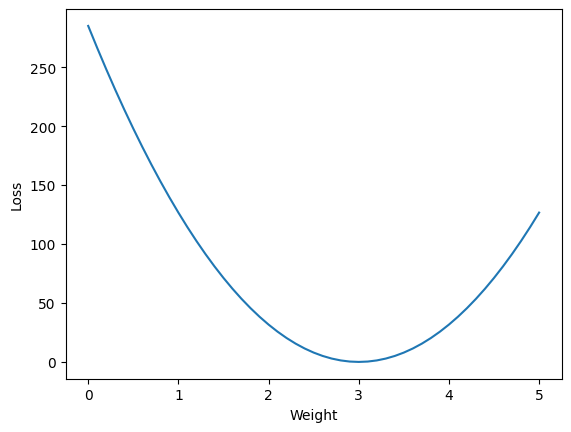

In [16]:
# Plot
plt.plot(weight_list, mse_list)
plt.xlabel('Weight')
plt.ylabel('Loss')

Finally we can find that the min MSE obtained when weight is 3, which is the correct weight.